In [49]:
import matplotlib.pyplot as plt
import numpy as np

import keras
from keras.layers import InputLayer
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD

In [29]:
# https://www.python-course.eu/neural_network_mnist.php
with open('mnist_train.csv','r') as f:
    lines = f.readlines()
train_labels = np.array([int(a.split(',')[0]) for a in lines])
train_images = np.array([list(map(int,a.split(',')[1:])) for a in lines])

with open('mnist_test.csv','r') as f:
    lines = f.readlines()
test_labels = np.array([int(a.split(',')[0]) for a in lines])
test_images = np.array([list(map(int,a.split(',')[1:])) for a in lines])

In [30]:
x_train = (train_images+.01)/255.0
x_test = (test_images+.01)/255.0

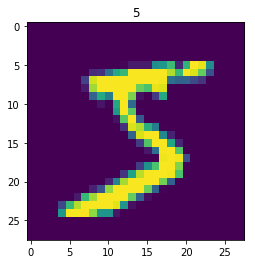

In [32]:
plt.imshow(x_train[0].reshape(28,28))
plt.title(str(train_labels[0]))
plt.show()

In [33]:
y_train = keras.utils.to_categorical(train_labels, num_classes=10)
y_test = keras.utils.to_categorical(test_labels, num_classes=10)

In [60]:
model = Sequential()
model.add(Dense(200, input_dim=784))
model.add(Dense(200, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))

In [61]:
sgd = SGD(lr=0.1)
model.compile(loss='mean_squared_error',
              optimizer=sgd,
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          epochs=10,
          batch_size=100)
score = model.evaluate(x_test, y_test, batch_size=100)
print(score)

Epoch 1/10
60000/60000 [==============================] - 2s 35us/step - loss: 0.0902 - acc: 0.2624
Epoch 2/10
60000/60000 [==============================] - 1s 24us/step - loss: 0.0788 - acc: 0.4577
Epoch 3/10
60000/60000 [==============================] - 1s 24us/step - loss: 0.0684 - acc: 0.6128
Epoch 4/10
60000/60000 [==============================] - 1s 24us/step - loss: 0.0585 - acc: 0.6956
Epoch 5/10
60000/60000 [==============================] - 1s 24us/step - loss: 0.0508 - acc: 0.7499
Epoch 6/10
60000/60000 [==============================] - 1s 24us/step - loss: 0.0452 - acc: 0.7880
Epoch 7/10
60000/60000 [==============================] - 1s 24us/step - loss: 0.0410 - acc: 0.8148
Epoch 8/10
60000/60000 [==============================] - 1s 24us/step - loss: 0.0377 - acc: 0.8315
Epoch 9/10
60000/60000 [==============================] - 1s 24us/step - loss: 0.0350 - acc: 0.8432
Epoch 10/10
10000/10000 [==============================] - 0s 43us/step
[0.030900103067979218, 0.863

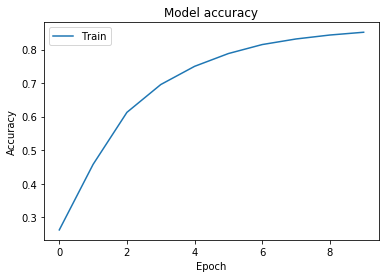

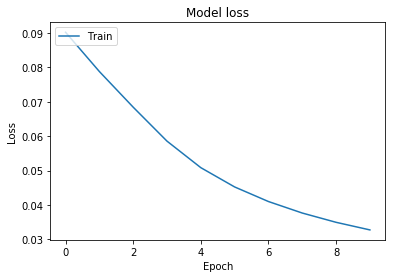

In [65]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()